In [66]:
%load_ext autoreload
%autoreload 2
import expert
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline  
T = 1000

def doppler(x, epsilon):
    return np.sin(2 * np.pi * (1 + epsilon) / (x + epsilon))

X = np.linspace(0, T, T)/T

Y = doppler(abs(1 - X), 0.38) + np.random.normal(0, 0.05, T)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
E = expert.LinearExpert1d(1)
for t in range(4):
    E.predict(X[t], t)
    E.update(Y[t], t)

In [68]:
print(E.history_x)
print(E.history_y)

[0.0, 0.001001001001001001, 0.002002002002002002, 0.0030030030030030034]
[0.046260848812778255, -0.010330467795595826, 0.016643534800881904, 0.014611375301465659]


Text(0.5, 1.0, 'Doppler function')

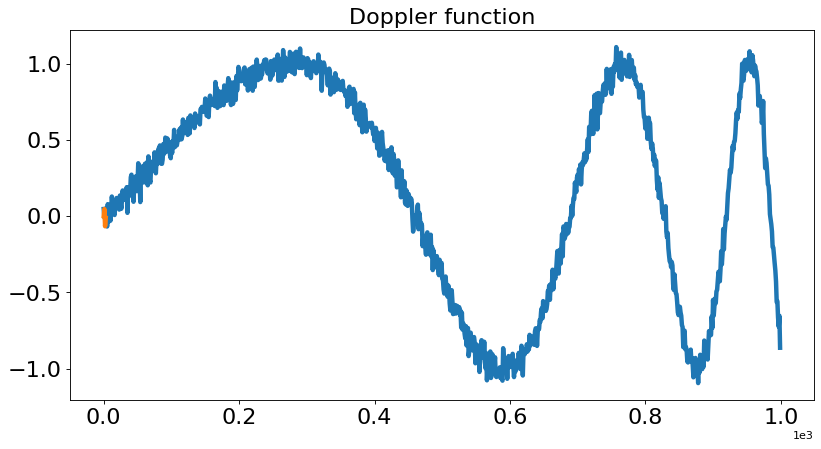

In [69]:
plt.hold = False
#t = np.linspace(0,sim_steps,sim_steps)/sim_steps
plt.figure(num=1, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(Y,linewidth=4)
plt.plot(np.array(E.predictions), linewidth = 4)
plt.tick_params(labelsize=20)
plt.title('Doppler function',fontsize=20)
#plt.savefig('doppler.pdf',bbox_inches='tight')

In [99]:
from flh import FLH

In [103]:
alg = FLH(100)

In [104]:
alg.run(X, Y)

W =  [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
W =  [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
W =  [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Text(0.5, 1.0, 'Doppler function')

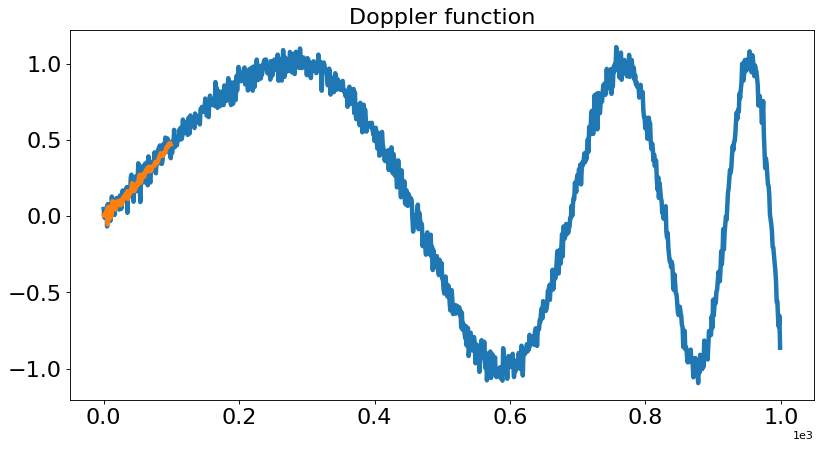

In [105]:
plt.hold = False
#t = np.linspace(0,sim_steps,sim_steps)/sim_steps
plt.figure(num=1, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(Y,linewidth=4)
plt.plot(np.array(alg.predictions), linewidth = 4)
plt.tick_params(labelsize=20)
plt.title('Doppler function',fontsize=20)
#plt.savefig('doppler.pdf',bbox_inches='tight')